## Mean-Variance Portfolio

The Mean-Variance Portfolio.ipynb file implements the principles of Markowitz Portfolio Theory to construct an optimal portfolio based on mean-variance optimization. 
Additionally, among all the portfolios lying on the Efficient Frontier, this file focuses on constructing the Tangency Portfolio, which is the portfolio with the highest Sharpe Ratio. The Tangency Portfolio is of particular interest because it maximizes returns per unit of risk, making it a crucial component for investors seeking to optimize their investment performance.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Define the list of tickers

In [2]:
stocks = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'META', 'GOOG', 'BRK-B', 'LLY', 'JPM', 'AVGO',
          'XOM', 'TSLA', 'UNH', 'V', 'PG', 'MA', 'COST', 'JNJ', 'HD', 'MRK']

### Retrieve stocks prices

In [3]:
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)

prices = pd.DataFrame()

for stock in stocks:
    price = yf.download(stock, start=start_date, end=end_date)['Adj Close']
    prices[stock] = price

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### Compute the monthly log returns

In [5]:
prices.index = pd.to_datetime(prices.index)
prices = prices.resample('1M').last()

In [6]:
log_returns = np.log(prices.shift(-1)) - np.log(prices)
log_returns = log_returns.dropna()

### Define a new function to compute the optimal weights of a mean-variance portfolio

In [7]:
def MVP_w(returns):
    ones = np.ones(len(returns.columns))
    mu = returns.mean()
    var_cov = returns.cov()
    numerator = np.linalg.inv(var_cov) @ mu
    denominator = ones.T @ np.linalg.inv(var_cov) @ mu
    optimal_weight = numerator/denominator
    return optimal_weight

### Compute the optimal weights with a 60 months rolling window

In [8]:
MVP_weights = pd.DataFrame(index = log_returns.index, columns = log_returns.columns)

for i in log_returns.index[60:]:
    start_date = i - pd.DateOffset(months = 60)
    end_date = i-pd.DateOffset(months = 1)
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    df = log_returns.loc[start_date:end_date]
    MVP_weights.loc[i] = MVP_w(df)
MVP_weights = MVP_weights.dropna()

### Compute the portfolio return

In [9]:
MVP_return = (MVP_weights * log_returns.iloc[60:]).sum(axis = 1)

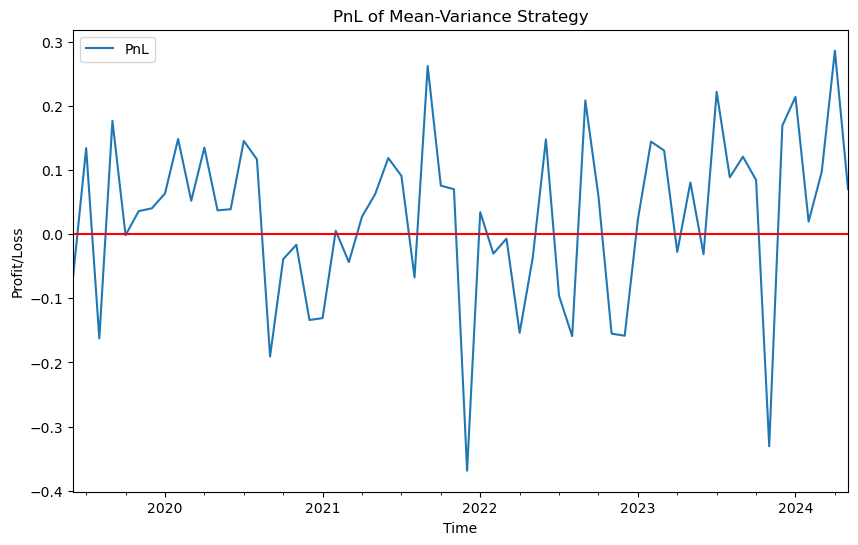

In [10]:
#Plot a graph to show the Profit/Loss
plt.figure(figsize=(10,6))
MVP_return.plot(label='PnL')
plt.xlabel('Time')
plt.ylabel('Profit/Loss')
plt.title('PnL of Mean-Variance Strategy')
plt.axhline(y=0, color='red')
plt.legend()
plt.show()

### Define a new function to compute the Sharpe Ratio

In [11]:
def sharpe_ratio(m_return):             
    Rf = 0
    annual_mean = m_return.mean() * 12
    annual_vol = m_return.std() * np.sqrt(12)       
    SR = (annual_mean-Rf)/annual_vol
    return SR

In [12]:
print(f"Annualized Sharpe ratio of MVP portfolio is {sharpe_ratio(MVP_return)}")

Annualized Sharpe ratio of MVP portfolio is 0.7117804248280127
